In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [3]:
# Reading the data
training_set=pd.read_csv('Train_Titanic.csv')
testing_set=pd.read_csv('Test_Titanic.csv')

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
survived=training_set[training_set['Survived']==1]

In [11]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
no_survived=training_set[training_set['Survived']==0]

In [13]:
no_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [14]:
print('% Survived=',(len(survived)/len(training_set)*100),'%')

% Survived= 38.38383838383838 %


In [15]:
print('% Not Survived =',(len(no_survived)/len(training_set)*100),'%')

% Not Survived = 61.61616161616161 %


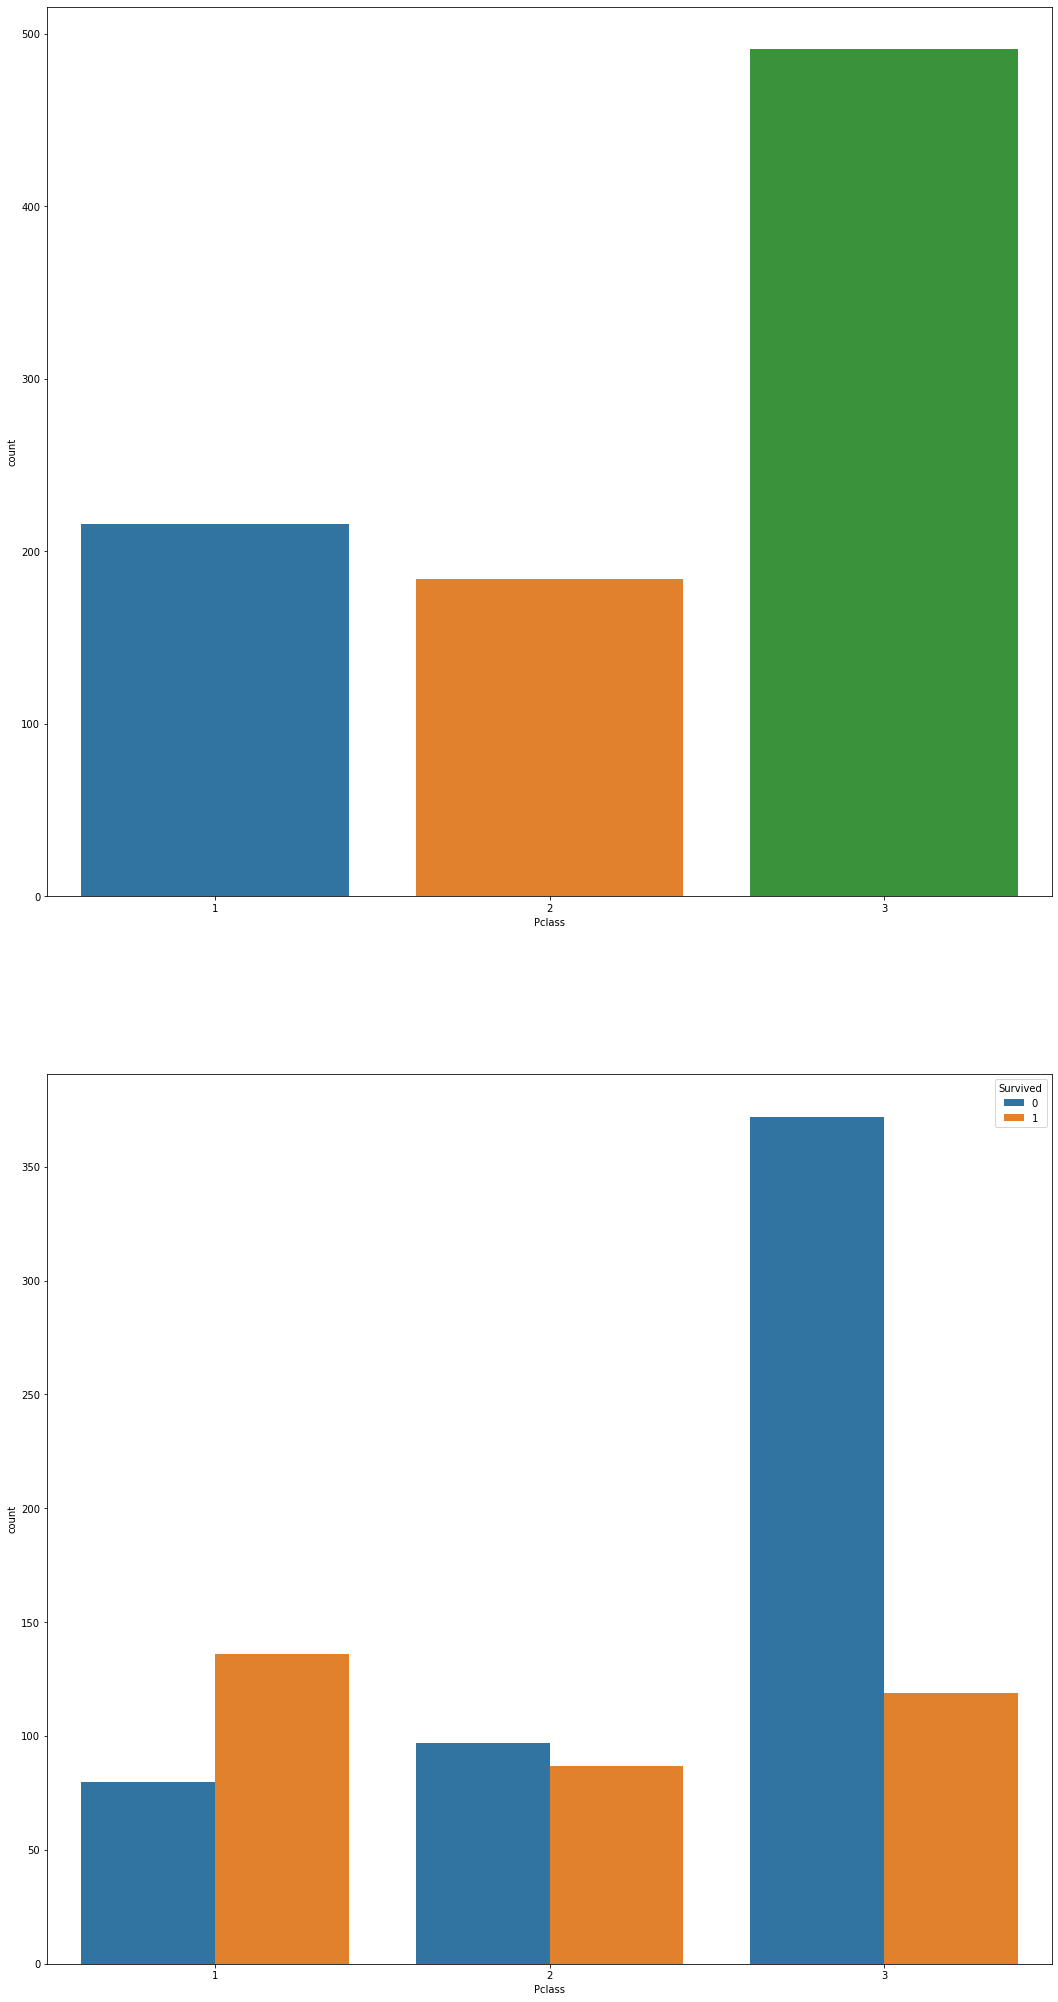

In [17]:
# 4. Visualizing the data
plt.figure(figsize=[18,36])
plt.subplot(211)
sns.countplot(x='Pclass', data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass', hue='Survived', data=training_set)

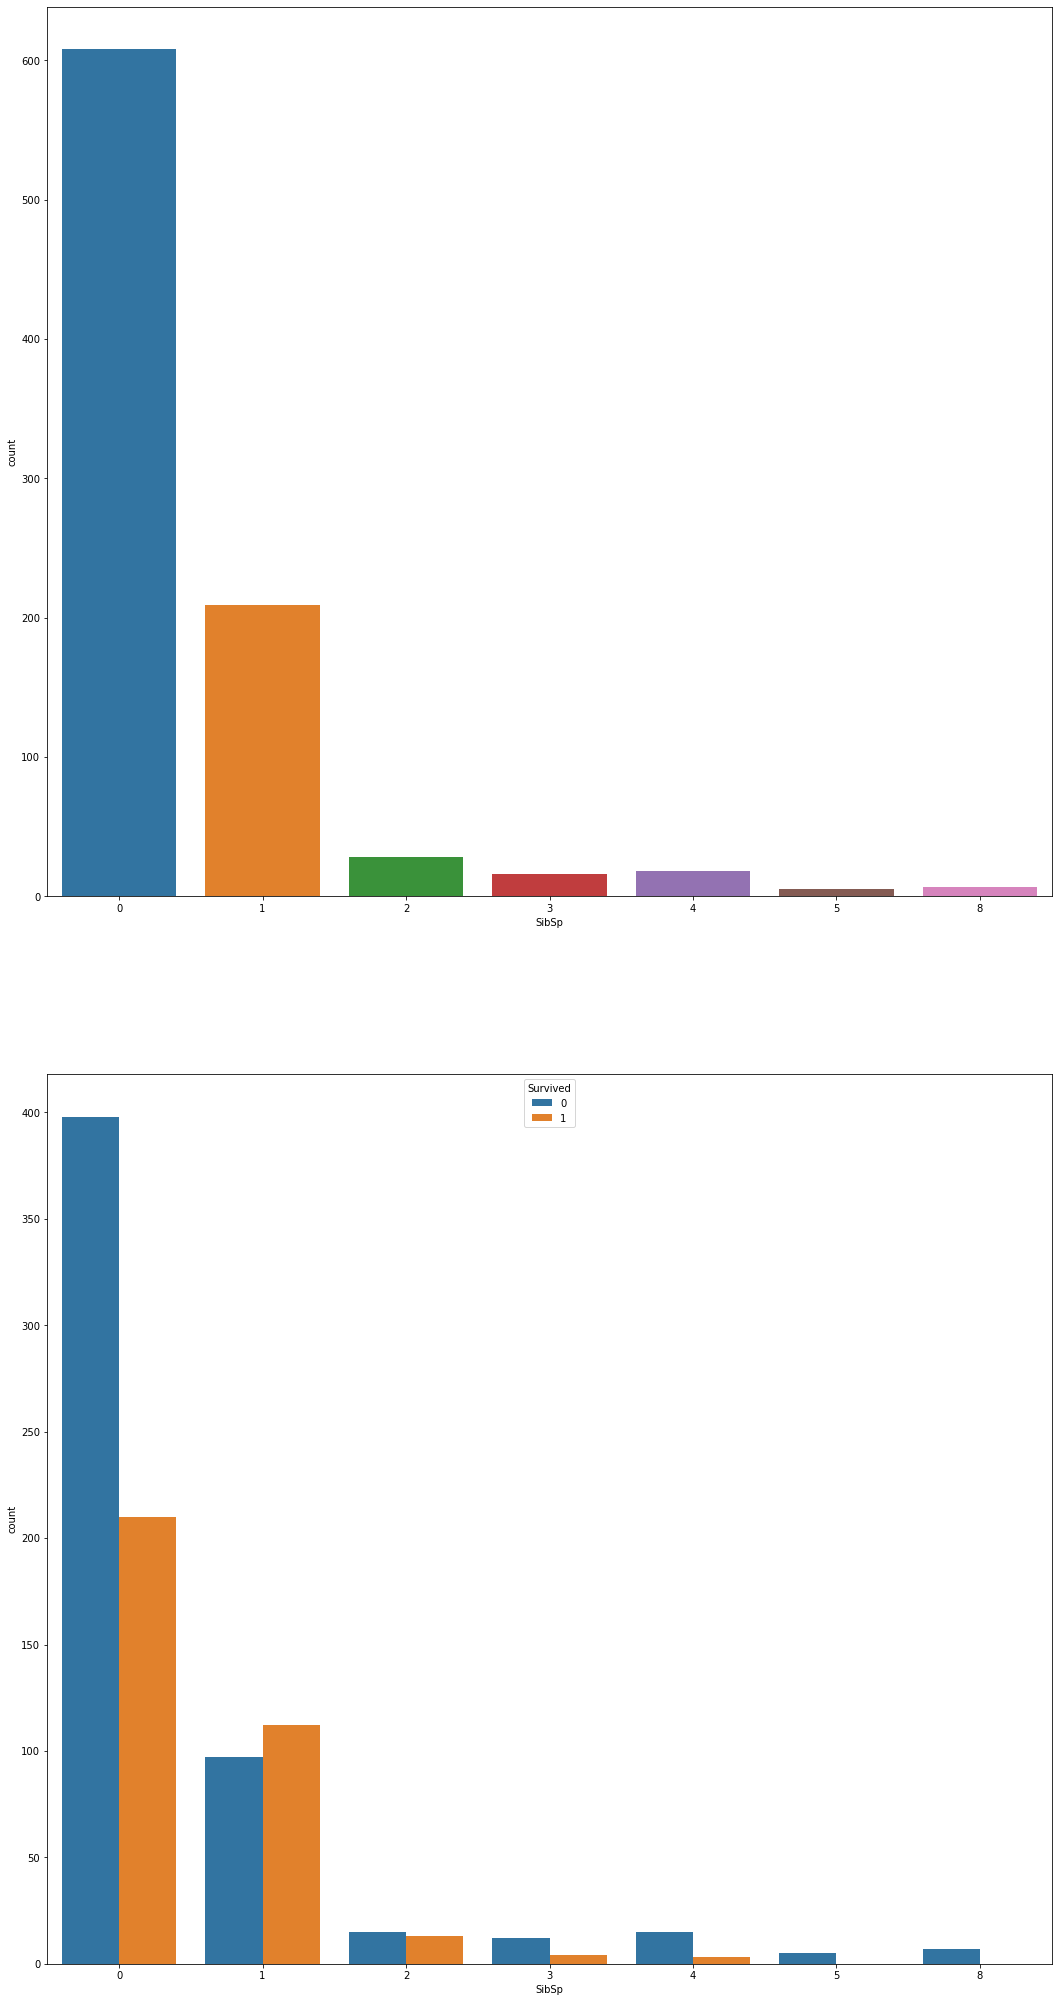

In [19]:
plt.figure(figsize=[18,36])
plt.subplot(211)
sns.countplot(x='SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp', hue='Survived', data=training_set)

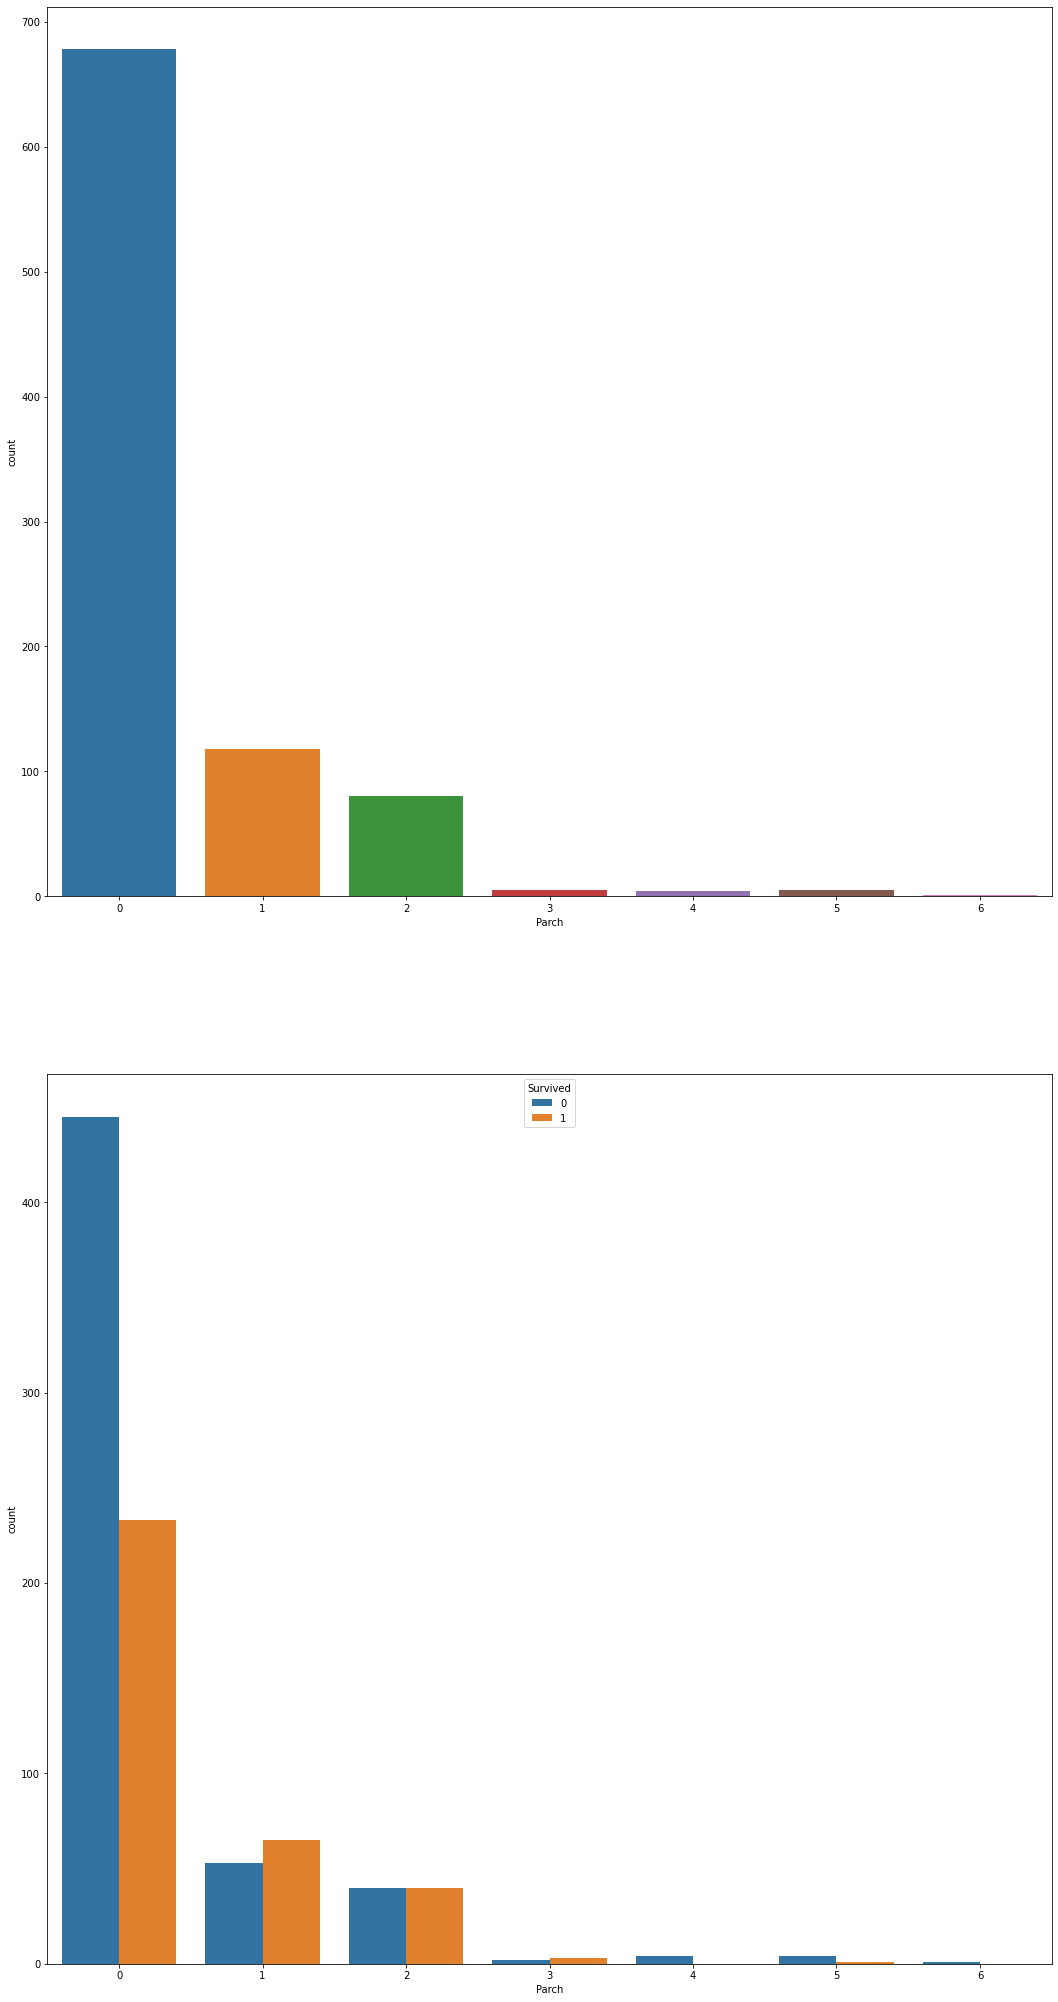

In [20]:
plt.figure(figsize=[18,36])
plt.subplot(211)
sns.countplot(x='Parch', data=training_set)
plt.subplot(212)
sns.countplot(x='Parch', hue='Survived', data=training_set)

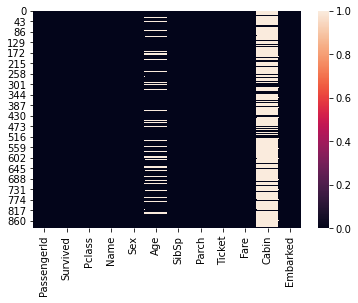

In [21]:
sns.heatmap(training_set.isnull())

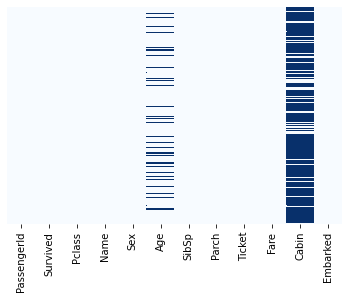

In [22]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues') 

In [6]:
training_set.drop('Cabin', axis=1, inplace=True)

In [24]:
training_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
training_set.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

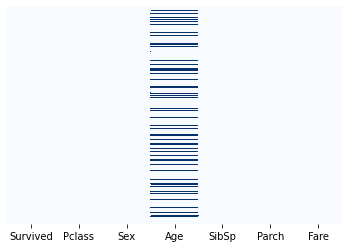

In [26]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [8]:
training_set[training_set['Sex']=='male']['Age'].mean()

30.72664459161148

In [9]:
training_set[training_set['Sex']=='female']['Age'].mean()

27.915708812260537

In [10]:
def fill_Age(data):
    age=data[0]
    sex=data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 31
        else:
            return 28
    else:
        return age

In [11]:
training_set['Age']=training_set[['Age', 'Sex']].apply(fill_Age, axis=1)

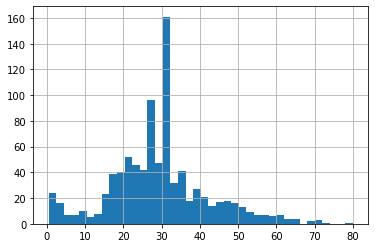

In [12]:
training_set['Age'].hist(bins=40)

In [33]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [16]:
male=pd.get_dummies(training_set['Sex'],drop_first=True)

In [17]:
training_set.drop(['Sex'],axis=1,inplace=True)

In [19]:
training_set=pd.concat([training_set,male],axis=1)

In [21]:
X=training_set.drop(['Survived'], axis=1).values
y=training_set['Survived'].values

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [23]:
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
y_predict=log_reg.predict(X_test)

In [25]:
cm=confusion_matrix(y_test, y_predict)

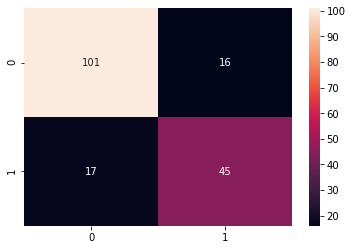

In [26]:
sns.heatmap(cm, annot=True, fmt='d')

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.73      0.73        62

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.82       179



In [33]:
# Grid Search
param_grid={
    'penalty':['l1','l2'],
    'C':np.logspace(0,4,5),
    'solver':['liblinear','lbfgs', 'newton-cg']
}

In [34]:
clf=GridSearchCV(log_reg, param_grid=param_grid, cv=3, verbose=True)

In [35]:
best_clf=clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, g

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.0s finished


In [36]:
print(best_clf.best_params_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
y_predict=best_clf.predict(X_test)

In [38]:
cm=confusion_matrix(y_test, y_predict)

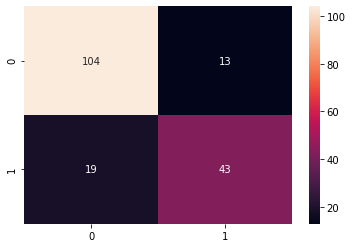

In [39]:
sns.heatmap(cm,annot=True,fmt='d')

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

